In [28]:
import pandas as pd
import numpy as np

In [79]:
df_112_2 = pd.read_csv("112_2.csv")
df_112_3 = pd.read_csv("112_3.csv")
df_112_4= pd.read_csv("112_4.csv")
df_113_1 = pd.read_csv("113_1.csv")
df_113_2 = pd.read_csv("113_2.csv")

result = pd.concat([df_112_2, df_112_3,df_112_4, df_113_1,df_113_2])
result = result[(result['都市土地使用分區']=='住' ) & (result['車位類別'].isna()) & (result['備註'].isna()) & (result['建物型態'] != '其他')]
#建立篩選後的資料集 analysis_taipei
column_names = ['鄉鎮市區', '交易年月', '每坪單價', '總價']
analysis = pd.DataFrame(columns=column_names)
# 在資料最前面插入縣市

analysis['鄉鎮市區'] = result['鄉鎮市區']
analysis['交易年月'] =  result['交易年月日'].astype('int')/100
analysis['每坪單價'] = result['單價元平方公尺'].fillna(0).astype('int')/0.3025
analysis['總價'] = result['總價元'].astype('int')
analysis.insert(0,'縣市',"新竹市")
# analysis = analysis[(analysis['交易年月'] > 11205 ) ]
analysis = analysis[(analysis['交易年月'] > 11205 ) & (analysis['交易年月'] < 11306)]

analysis = analysis.reset_index(drop=True)

# 把值 無條件捨去
analysis['交易年月'] = analysis['交易年月'].apply(np.floor)
analysis['每坪單價'] = analysis['每坪單價'].apply(np.floor)
analysis['總價'] = analysis['總價'].apply(np.floor)

# df_sorted = df.sort_values(by='A')
analysis = analysis.sort_values(by='交易年月')

In [81]:
mean_11206 = []
mean_11207 = []
mean_11208 = []
mean_11209 = []
mean_11210 = []
mean_11211 = []
mean_11212 = []
mean_11301 = []
mean_11302 = []
mean_11303 = []
mean_11304 = []
mean_11305 = []

for i in  range(len(analysis)):
 if analysis.iloc[i]['交易年月'] == 11206:
    mean_11206.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11207:
    mean_11207.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11208:
    mean_11208.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11209:
    mean_11209.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11210:
    mean_11210.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11211:
    mean_11211.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11212:
    mean_11212.append(analysis.iloc[i]['每坪單價'])

# 113年
 elif analysis.iloc[i]['交易年月'] == 11301:
    mean_11301.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11302:
    mean_11302.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11303:
    mean_11303.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11304:
    mean_11304.append(analysis.iloc[i]['每坪單價'])
 elif analysis.iloc[i]['交易年月'] == 11305:
    mean_11305.append(analysis.iloc[i]['每坪單價'])


In [82]:
mean_11206 = np.floor(np.mean(mean_11206))
mean_11207 = np.floor(np.mean(mean_11207))
mean_11208 = np.floor(np.mean(mean_11208))
mean_11209 = np.floor(np.mean(mean_11209))
mean_11210 = np.floor(np.mean(mean_11210))
mean_11211 = np.floor(np.mean(mean_11211))
mean_11212 = np.floor(np.mean(mean_11212))

mean_11301 = np.floor(np.mean(mean_11301))
mean_11302 = np.floor(np.mean(mean_11302))
mean_11303 = np.floor(np.mean(mean_11303))
mean_11304 = np.floor(np.mean(mean_11304))
mean_11305 = np.floor(np.mean(mean_11305))


# 创建一个字典来存储这些平均值
data = {
    'mean': [mean_11206, mean_11207, mean_11208, mean_11209, mean_11210, mean_11211, mean_11212,
             mean_11301, mean_11302, mean_11303, mean_11304, mean_11305],
    'date': ['11206', '11207', '11208', '11209', '11210', '11211', '11212',
             '11301', '11302', '11303', '11304', '11305']
}

# 创建 DataFrame
result = pd.DataFrame(data)

print(result)

        mean   date
0   271459.0  11206
1   323028.0  11207
2   283440.0  11208
3   300110.0  11209
4   300385.0  11210
5   293405.0  11211
6   311013.0  11212
7   299420.0  11301
8   342209.0  11302
9   318418.0  11303
10  353647.0  11304
11  233087.0  11305


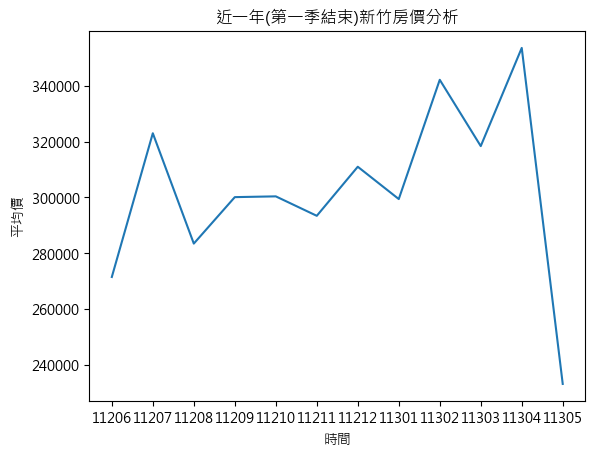

In [84]:
import matplotlib.pyplot as plt
from pylab import *
mpl.rcParams['font.sans-serif'] = ['Microsoft JhengHei']


plt.plot(result['date'], result['mean'])

# 添加標題和標籤
plt.title('近一年(第一季結束)新竹房價分析')
plt.xlabel('時間')
plt.ylabel('平均價')

# 顯示圖形
plt.show()